# skLearn nonnegative matrix factorization (NMF) and latent Dirichlet allocation (LDA)

## LDA(skLearn) {GridSearch} ->Rate of perplexity

In [ ]:
#Inspired by blog post - https://hk.saowen.com/a/e6647679d945f0b373c9dbee29c5f47ed40645ae4ebd5869ca5d5ba96044fec8

What are the pros and cons of LDA and NMF in topic modeling? Under what situations should we choose LDA or NMF? Is there comparison of two techniques in topic modeling?
There are pros and cons of both techniques. LDA is good in identifying coherent topics where as NMF usually gives incoherent topics. However, in the average case NMF and LDA are similar but LDA is more consistent

LDA is based on probabilistic graphical modeling while NMF relies on linear algebra

In [33]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation
import re 

no_topics = 20
no_top_words = 10
no_features = 1000

In [2]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [30]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
type(documents)

list

Remove emails and newline characters

In [4]:
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [5]:

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


C:\Users\praveen ji\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [6]:
print("Topics Created by NMF")
display_topics(nmf, tfidf_feature_names, no_top_words)
print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
print("Topics Created by LDA")
display_topics(lda, tf_feature_names, no_top_words)

Topics Created by NMF
Topic 0:
people time right did good said say make way government
Topic 1:
window problem using server application screen display motif manager running
Topic 2:
god jesus bible christ faith believe christian christians sin church
Topic 3:
game team year games season players play hockey win league
Topic 4:
new 00 sale 10 price offer shipping condition 20 15
Topic 5:
thanks mail advance hi looking info help information address appreciated
Topic 6:
windows file files dos program version ftp ms directory running
Topic 7:
edu soon cs university ftp internet article email pub david
Topic 8:
key chip clipper encryption keys escrow government public algorithm nsa
Topic 9:
drive scsi drives hard disk ide floppy controller cd mac
Topic 10:
just ll thought tell oh little fine work wanted mean
Topic 11:
does know anybody mean work say doesn help exist program
Topic 12:
card video monitor cards drivers bus vga driver color memory
Topic 13:
like sounds looks look bike sound lot 

# Topic Optimization using GridSearchCV

LDA in python -> https://hk.saowen.com/a/e6647679d945f0b373c9dbee29c5f47ed40645ae4ebd5869ca5d5ba96044fec8

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_topics': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_topics': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [9]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(tf )

C:\Users\praveen ji\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\praveen ji\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\praveen ji\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\praveen ji\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' 

C:\Users\praveen ji\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\praveen ji\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\praveen ji\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\praveen ji\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' 

GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_components': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tf))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -1048232.7126159492
Model Perplexity:  270.8776210757811


In [11]:
#topic-Keyword Matrix
df_topic_keywords =pd.DataFrame(best_lda_model.components_)

In [12]:
df_topic_keywords

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.100011,228.197365,0.100006,3.438534,0.100005,0.100016,0.100000,0.100000,155.824285,100.405430,...,23.825924,16.747430,0.100052,0.100002,0.100001,414.347273,956.980314,40.357577,3.352461,206.149908
1,0.100018,0.100012,0.101926,0.100516,0.103233,0.100572,0.100002,0.100001,106.716106,46.210064,...,39.539289,0.100035,40.628019,42.658265,249.564511,0.106392,0.100021,0.100032,0.100015,0.100020
2,0.100017,0.100003,0.100001,15.795122,0.100002,150.110056,266.847335,622.857881,3.849865,0.100024,...,0.100001,0.100000,0.100000,0.100000,0.100100,0.100049,0.100014,0.100000,0.100000,0.100000
3,0.100012,135.120764,0.100015,0.101857,0.100014,0.101710,0.100002,0.100001,41.899444,5.215860,...,0.100032,0.100227,15.184710,0.100001,0.100002,625.822379,135.297367,8.793414,212.577677,65.844367
4,0.100021,0.100032,0.100030,0.100125,0.101228,14.147865,0.100001,0.100000,17.991328,27.912781,...,157.355711,0.100037,0.100058,188.714799,0.100034,1.258204,0.100417,32.009561,16.025795,7.370062
5,0.100010,0.100055,0.100009,0.100021,0.100005,0.100011,0.100000,0.100000,39.827784,103.089182,...,0.100243,402.339327,1.421578,0.100006,0.100004,0.100170,209.382969,321.860468,0.100023,43.488092
6,0.100004,0.100011,0.100003,0.100014,0.100001,0.100008,0.100000,0.100000,0.100393,1.094992,...,138.954103,254.625382,105.227528,0.100004,0.100002,0.121123,19.757048,201.643171,0.100044,0.102025
7,0.100022,2.604110,0.100022,0.100015,0.100003,0.100034,0.100000,0.100000,0.100064,4.174363,...,0.100038,0.100087,40.072790,0.100002,0.100003,417.852375,0.114076,122.071586,51.784603,0.100043
8,0.100013,0.100027,0.100005,0.100013,0.100003,0.100009,0.100000,0.100000,0.100052,4.336278,...,25.375302,6.809751,0.100021,0.100001,0.100002,0.100120,59.444382,8.608352,0.100025,0.100016
9,1117.872141,314.628903,232.419727,264.141087,230.194752,216.987211,0.100012,0.100004,1291.497806,249.273615,...,0.102502,0.100405,0.100037,0.100008,0.100080,18.819996,10.884939,0.100222,15.182293,0.100094


In [14]:
#Create Document - Topic Matrix
lda_output = best_lda_model.transform(tf)

Compare LDA Model Performance Scores

In [16]:
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\praveen ji\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\praveen ji\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\praveen ji\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


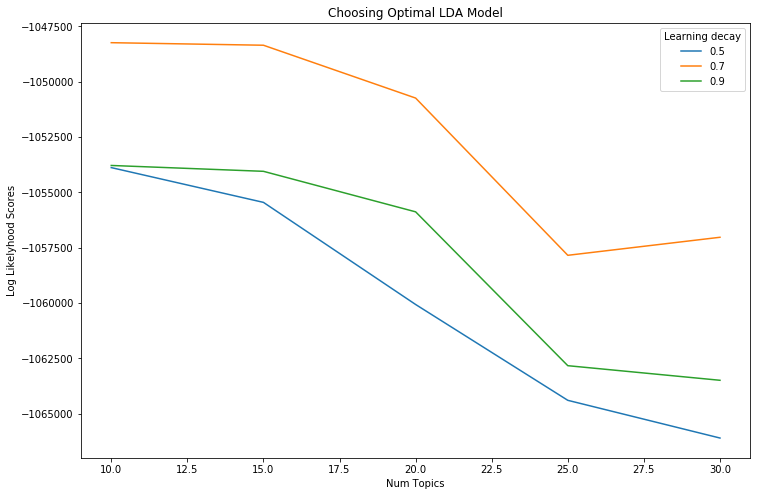

In [17]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [10, 15, 20, 25, 30]
log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]
log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

How to see the dominant topic in each document?

In [22]:
print(best_lda_model.n_topics)

None


In [32]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(tf)

# Make Pandas Dataframe
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(documents))]
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.36,0,0,0,0,0.3,0.2,0,0.12,0,0
Doc1,0,0,0,0.06,0,0.28,0.64,0,0,0,6
Doc2,0.43,0,0,0,0,0.54,0,0,0,0,5
Doc3,0.26,0.09,0,0,0,0.22,0,0,0.42,0,8
Doc4,0.01,0.01,0.01,0.07,0.16,0.64,0.01,0.1,0.01,0.01,5
Doc5,0.21,0.01,0.01,0.01,0.01,0.34,0.39,0.01,0.01,0.01,6
Doc6,0.14,0.26,0,0.06,0,0.39,0,0,0,0.14,5
Doc7,0.21,0,0,0,0,0.43,0.27,0.04,0,0.04,5
Doc8,0,0,0,0,0,0.96,0,0,0,0,5
Doc9,0.35,0.14,0,0,0,0.43,0,0,0.07,0,5


 Review topics distribution across documents

In [34]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,5,3380
1,1,2071
2,0,1793
3,6,1480
4,4,1152
5,8,553
6,3,382
7,9,337
8,7,148
9,2,18


How to visualize the LDA model with pyLDAvis?

In [37]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, tf, tf_vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
5      17.721110        1       1   53.362564  -70.088058
2      15.120295        1       2  152.599747  -27.741310
0      12.333006        1       3  122.883369   82.747574
4      11.359369        1       4    3.719420 -144.714813
6      11.242462        1       5    9.369537   89.159782
1      11.227909        1       6  -83.190399   37.549339
8       6.922519        1       7  -74.479698  -79.759369
9       6.438183        1       8   68.450096   14.682597
3       4.433636        1       9  -12.431137  -14.778957
7       3.201511        1      10  120.073029 -127.787872, topic_info=     Category          Freq        Term         Total  loglift  logprob
term                                                                   
147   Default  61936.000000          ax  61936.000000  30.0000  30.0000
583   Default   4547.000000         max   4547.000000  29.0000  29.0000
336   Default   2419.000000         edu   2419.000000  28.0000  28.0000
418   Default   1897.000000         god   1897.000000  27.0000  27.0000
321   Default   3892.000000         don   3892.000000  26.0000  26.0000
8     Default   1657.000000          10   1657.000000  25.0000  25.0000
845   Default   1248.000000       space   1248.000000  24.0000  24.0000
509   Default   1245.000000         key   1245.000000  23.0000  23.0000
995   Default   1495.000000        year   1495.000000  22.0000  22.0000
897   Default   2992.000000       think   2992.000000  21.0000  21.0000
508   Default   3728.000000        just   3728.000000  20.0000  20.0000
670   Default   4068.000000      people   4068.000000  19.0000  19.0000
0     Default   1122.000000          00   1122.000000  18.0000  18.0000
380   Default   1748.000000        file   1748.000000  17.0000  17.0000
931   Default   3216.000000         use   3216.000000  16.0000  16.0000
424   Default   1244.000000  government   1244.000000  15.0000  15.0000
973   Default   1225.000000     windows   1225.000000  14.0000  14.0000
402   Default    837.000000        game    837.000000  13.0000  13.0000
883   Default    782.000000        team    782.000000  12.0000  12.0000
944   Default   1880.000000          ve   1880.000000  11.0000  11.0000
612   Default    910.000000          mr    910.000000  10.0000  10.0000
148   Default   1270.000000         b8f   1270.000000   9.0000   9.0000
16    Default   1061.000000          15   1061.000000   8.0000   8.0000
28    Default   1085.000000          20   1085.000000   7.0000   7.0000
516   Default   3473.000000        know   3473.000000   6.0000   6.0000
34    Default    984.000000          25    984.000000   5.0000   5.0000
235   Default   1449.000000         com   1449.000000   4.0000   4.0000
540   Default   3962.000000        like   3962.000000   3.0000   3.0000
401   Default   1171.000000         g9v   1171.000000   2.0000   2.0000
325   Default   1073.000000       drive   1073.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
428   Topic10    290.830347      ground    353.830209   3.2455  -4.1040
783   Topic10    198.564608      safety    254.933091   3.1917  -4.4856
888   Topic10    220.169298        term    302.265875   3.1246  -4.3823
363   Topic10    174.142746       extra    250.076435   3.0797  -4.6168
761   Topic10    141.420048    reported    220.871839   2.9957  -4.8250
660   Topic10    154.045342        page    249.708791   2.9585  -4.7395
661   Topic10    146.745225       paper    242.113506   2.9408  -4.7880
737   Topic10    181.643903       radio    300.884659   2.9369  -4.5747
535   Topic10    142.123781      letter    242.820666   2.9059  -4.8200
595   Topic10    175.353315   mentioned    301.292333   2.9003  -4.6099
731   Topic10    130.345231   published    231.966374   2.8651  -4.9065
667   Topic10    201.107855         pay    374.821824   2.8189  -4.4729
802   Topic10    238.

How to see the Topic’s keywords?

In [39]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = tf_vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

,00,000,01,02,03,04,0d,0t,10,100,...,written,wrong,wrote,x11,xt,year,years,yes,york,young
Topic0,0.100011,228.197365,0.100006,3.438534,0.100005,0.100016,0.100000,0.100000,155.824285,100.405430,...,23.825924,16.747430,0.100052,0.100002,0.100001,414.347273,956.980314,40.357577,3.352461,206.149908
Topic1,0.100018,0.100012,0.101926,0.100516,0.103233,0.100572,0.100002,0.100001,106.716106,46.210064,...,39.539289,0.100035,40.628019,42.658265,249.564511,0.106392,0.100021,0.100032,0.100015,0.100020
Topic2,0.100017,0.100003,0.100001,15.795122,0.100002,150.110056,266.847335,622.857881,3.849865,0.100024,...,0.100001,0.100000,0.100000,0.100000,0.100100,0.100049,0.100014,0.100000,0.100000,0.100000
Topic3,0.100012,135.120764,0.100015,0.101857,0.100014,0.101710,0.100002,0.100001,41.899444,5.215860,...,0.100032,0.100227,15.184710,0.100001,0.100002,625.822379,135.297367,8.793414,212.577677,65.844367
Topic4,0.100021,0.100032,0.100030,0.100125,0.101228,14.147865,0.100001,0.100000,17.991328,27.912781,...,157.355711,0.100037,0.100058,188.714799,0.100034,1.258204,0.100417,32.009561,16.025795,7.370062


Get the top 15 keywords each topic

In [43]:
# Show top n keywords for each topic
def show_topics(vectorizer=tf_vectorizer, lda_model=best_lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=tf_vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,people,said,years,time,did,children,day,car,israel,went,war,new,came,old,jews
Topic 1,windows,use,drive,using,card,window,thanks,dos,does,problem,disk,bit,pc,scsi,db
Topic 2,ax,max,b8f,g9v,a86,pl,145,1d9,34u,0t,1t,3t,bhj,giz,75u
Topic 3,game,team,mr,armenian,year,games,play,armenians,president,turkish,season,hockey,league,players,russian
Topic 4,edu,file,com,mail,available,information,program,ftp,send,files,list,email,image,info,pub
Topic 5,don,just,like,know,think,good,ve,want,really,time,going,make,ll,way,sure
Topic 6,god,people,believe,does,jesus,say,true,think,question,don,know,christian,bible,life,way
Topic 7,states,year,health,bike,united,rules,study,ground,new,tax,jobs,work,section,term,dod
Topic 8,key,government,gun,law,chip,use,public,encryption,security,keys,clipper,state,control,guns,technology
Topic 9,10,space,00,15,20,25,12,11,14,17,16,13,30,18,24


# How to predict the topics for a new piece of text?

Tokenize and Clean-up using gensim’s simple_preprocess()

In [48]:
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(documents))

print(data_words[:1])

C:\Users\praveen ji\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\praveen ji\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


[['well', 'not', 'sure', 'about', 'the', 'story', 'nad', 'it', 'did', 'seem', 'biased', 'what', 'disagree', 'with', 'is', 'your', 'statement', 'that', 'the', 'media', 'is', 'out', 'to', 'ruin', 'israels', 'reputation', 'that', 'is', 'rediculous', 'the', 'media', 'is', 'the', 'most', 'pro', 'israeli', 'media', 'in', 'the', 'world', 'having', 'lived', 'in', 'europe', 'realize', 'that', 'incidences', 'such', 'as', 'the', 'one', 'described', 'in', 'the', 'letter', 'have', 'occured', 'the', 'media', 'as', 'whole', 'seem', 'to', 'try', 'to', 'ignore', 'them', 'the', 'is', 'subsidizing', 'israels', 'existance', 'and', 'the', 'europeans', 'are', 'not', 'at', 'least', 'not', 'to', 'the', 'same', 'degree', 'so', 'think', 'that', 'might', 'be', 'reason', 'they', 'report', 'more', 'clearly', 'on', 'the', 'atrocities', 'what', 'is', 'shame', 'is', 'that', 'in', 'austria', 'daily', 'reports', 'of', 'the', 'inhuman', 'acts', 'commited', 'by', 'israeli', 'soldiers', 'and', 'the', 'blessing', 'received

Lemmatization

In [50]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:81: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr))[0]
C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\praveen

C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])


['not sure story nad do seem bias what disagree be  statement media be ruin israel reputation that be rediculous medium be most pro israeli medium world have live europe realize incidenc such one describe letter have occur medium whole seem try ignore be subsidize israel existance european be not least not same degree so think may be reason report more clearly atrocity what be shame be austria daily report inhuman act commit israeli soldier blessing receive government make holocaust guilt go away after look how be treat other race when get power be unfortunate', 'do expect people read faq actually accept hard atheism need little leap faith jimmy  logic run steam jim sorry can pity jim have feeling denial faith need get just pretend will all end happily ever anyway maybe start new newsgroup alt atheist hard win be bummin so much big jim forget  flintstone chewable bake timmon']


In [51]:
import spacy
# Define function to predict topic for a given text document.
nlp = spacy.load('en', disable=['parser', 'ner'])

def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    # Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    # Step 3: Vectorize transform
    mytext_4 = tf_vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = best_lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores

# Predict the topic
mytext = ["Some text about christianity and bible"]
topic, prob_scores = predict_topic(text = mytext)
print(topic)

C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:81: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr))[0]
C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\praveen

C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])


['god', 'people', 'believe', 'does', 'jesus', 'say', 'true', 'think', 'question', 'don', 'know', 'christian', 'bible', 'life', 'way']


How to cluster documents that share similar topics and plot?

In [53]:
# Sklearn
from sklearn.decomposition import TruncatedSVD
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.28  0.36  0.02  0.1   0.21  0.8   0.25  0.08  0.12  0.09]
 [-0.18  0.89  0.   -0.04  0.13 -0.28 -0.26 -0.01 -0.04  0.04]]
Perc of Variance Explained: 
 [0.07 0.25]


Text(0.5,1,'Segregation of Topic Clusters')

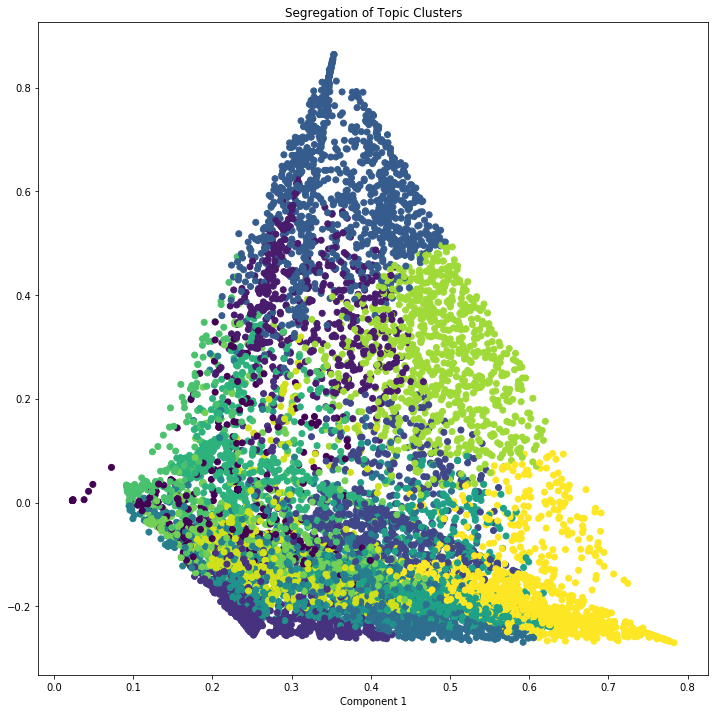

In [54]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

How to get similar documents for a given document?

In [55]:
from sklearn.metrics.pairwise import euclidean_distances

nlp = spacy.load('en', disable=['parser', 'ner'])

def similar_documents(text, doc_topic_probs, documents = data, nlp=nlp, top_n=5, verbose=False):
    topic, x  = predict_topic(text)
    dists = euclidean_distances(x.reshape(1, -1), doc_topic_probs)[0]
    doc_ids = np.argsort(dists)[:top_n]
    if verbose:        
        print("Topic KeyWords: ", topic)
        print("Topic Prob Scores of text: ", np.round(x, 1))
        print("Most Similar Doc's Probs:  ", np.round(doc_topic_probs[doc_ids], 1))
    return doc_ids, np.take(documents, doc_ids)

C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:81: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr))[0]
C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\praveen

C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
C:\Users\praveen ji\Anaconda3\lib\site-packages\msgpack_numpy.py:77: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])


In [56]:
# Get similar documents
mytext = ["Some text about christianity and bible"]
doc_ids, docs = similar_documents(text=mytext, doc_topic_probs=lda_output, documents = data, top_n=1, verbose=True)
print('\n', docs[0][:500])

Topic KeyWords:  ['god', 'people', 'believe', 'does', 'jesus', 'say', 'true', 'think', 'question', 'don', 'know', 'christian', 'bible', 'life', 'way']
Topic Prob Scores of text:  [[0.  0.  0.  0.  0.  0.  0.8 0.  0.  0. ]]
Most Similar Doc's Probs:   [[0.  0.  0.  0.  0.  0.  0.8 0.  0.  0. ]]

 From: (HJ Lu) Subject: Re: Booting from B drive Organization: School of EECS, Washington State University Lines: 17 In article (Paul Yee) writes: |> In article (Mohammad Razi Khan) writes: |> (Gordon Lang) writes: |> > |> >>David Weisberger wrote: |> >>: I have a 5 1/4" drive as drive A. How can I make the system boot from |> >>: my 3 1/2" B drive? |> |> [intermediate reply suggesting cable switch deleted] |> I heard boot_b.zip could do exactly what you wanted without touching anything. Check it
